# Exploratory Data Analysis

## Data Dictionary

| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| (Target) Loan approved (Y/N)                   	|

## Data & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 

import math

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/train.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Categorical Variables Analysis

Sources:
1. https://stackoverflow.com/questions/10861800/how-to-iterate-over-a-2d-array-with-a-single-loop
2. https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib/54266570#54266570
3. https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn

/home/jacob/Code/Loan-Prediction/.venv/lib/python3.7/site-packages/seaborn/palettes.py:244: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  palette = _ColorPalette(palette)


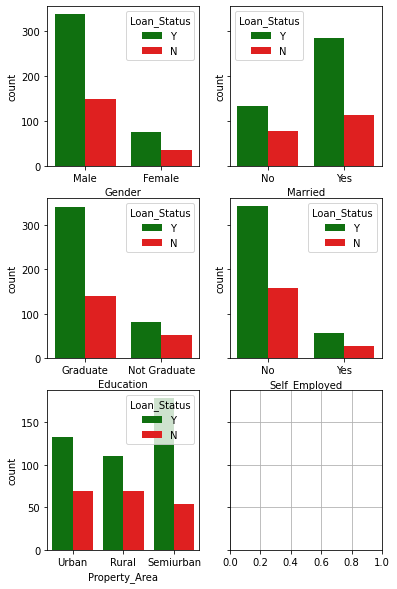

In [5]:
categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
n = len(categorical_features)
nrows = math.ceil(n/2)
ncols = 2
fig, ax = plt.subplots(nrows, ncols, sharey='row', figsize = (6, 10))
for index, categorical_feature in enumerate(categorical_features):
    sns.countplot(x = categorical_feature, 
                  data = train,
                  hue = 'Loan_Status',
                  ax = ax[math.floor(index/ncols)][index%ncols],
                  palette = {'Y':'green','N':'R'})
plt.grid()
plt.show()

## Handling Missing Values

1. https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
2. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib.patches.Rectangle
3. https://matplotlib.org/3.1.1/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
4. https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html#proxy-legend-handles

In [6]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
missing_df = train.isna().sum().reset_index()
has_missing = missing_df[missing_df[0] > 0]['index'].to_list()

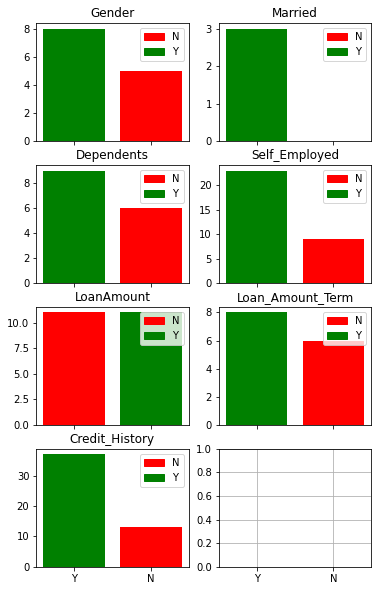

In [8]:
n = len(has_missing)
nrows = math.ceil(n/2)
ncols = 2
fig, ax = plt.subplots(nrows, ncols, sharex = 'col', figsize = (6, 10))
for index, missing in enumerate(has_missing):
    val_counts_df = train[train[missing].isna()]['Loan_Status'].value_counts().reset_index()

    colors = {'N':'red', 'Y':'green'}
    labels = list(colors.keys())
    c = val_counts_df['index'].apply(lambda x: colors[x])
    
    ax[math.floor(index/ncols)][index%ncols]\
    .bar(x = val_counts_df['index'], height = val_counts_df['Loan_Status'], 
         color = c, 
         label = labels)
    ax[math.floor(index/ncols)][index%ncols].set_title(missing)
    handles = [mpatches.Patch(color=colors[label]) for label in labels]
    ax[math.floor(index/ncols)][index%ncols].legend(handles, labels)
plt.grid()
plt.show()

Since the number of missing values are very few for any given loan status and no relationship can be observed with the naked eye, we can use an algorithm to fill in the missing values.

## Random Forests to fill missing values

1. https://www.mikulskibartosz.name/fill-missing-values-using-random-forest/
2. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74?gi=e5fc5ee0d775

### Encoding Variables

1. https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

In [9]:
train_encoded = train.copy()
train_encoded['Self_Employed'] = pd.Series(np.where(train.Self_Employed.values == "Yes", 1, 0),
                                          train.index)
train_encoded['Married'] = pd.Series(np.where(train.Married.values == 'Yes', 1, 0), 
                                     train.index)
train_encoded['Gender'] = pd.Series(np.where(train.Gender.values == 'Male', 1, 0), 
                                    train.index)
train_encoded['Education'] = pd.Series(np.where(train.Education.values == 'Graduate', 1, 0), 
                                       train.index)
train_encoded['Loan_Status'] = pd.Series(np.where(train.Loan_Status.values == 'Y', 1, 0), 
                                         train.index)
train_encoded = pd.get_dummies(train_encoded, columns = ['Property_Area','Dependents'], dummy_na = True)
train_encoded.drop(['Property_Area_nan'], axis = 1, inplace = True)
train_encoded.loc[train_encoded.Dependents_nan == 1, ["Dependents_0", 
                                                      "Dependents_1", 
                                                      "Dependents_2", 
                                                      "Dependents_3+"]] = np.nan

In [10]:
has_missing

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

### Gender RF Model

In [11]:
train_with_gender, validate_with_gender = \
train_test_split(train_encoded[train_encoded['Gender'].notnull()].dropna(), test_size = 0.2)
train_with_gender_X = train_with_gender.drop(['Gender', 'Loan_ID'], axis = 1)
train_with_gender_y = train_with_gender['Gender']
validate_with_gender_X = validate_with_gender.drop(['Gender', 'Loan_ID'], axis = 1)
validate_with_gender_y = validate_with_gender['Gender']

In [12]:
train_without_gender = train_encoded[train_encoded['Gender'].isnull()]

In [17]:
rfModel_Gender  = RandomForestClassifier(n_estimators = 1000,
                                         max_depth = 4, 
                                         max_features = 'log2')
rfModel_Gender.fit(train_with_gender_X, train_with_gender_y)

RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=1000)

In [18]:
validate_pred_y = rfModel_Gender.predict(X = validate_with_gender_X)

In [19]:
accuracy_score(validate_with_gender_y, validate_pred_y)

0.7884615384615384

In [16]:
print(classification_report(validate_with_gender_y, validate_pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.79      1.00      0.88        82

    accuracy                           0.79       104
   macro avg       0.39      0.50      0.44       104
weighted avg       0.62      0.79      0.70       104



/home/jacob/Code/Loan-Prediction/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
